In [313]:
import networkx as nx
import pickle
import matplotlib.pyplot as plt
import pandas as pd
# added python lib
import numpy as np
import scipy as sp

In [314]:
# Dependency Graph

G=nx.DiGraph()
G.add_nodes_from([1,2,3,4,5,6])
G.add_edges_from([(6,2),(6,3),(2,4),(4,5),(5,1),(3,1),(6,5)])


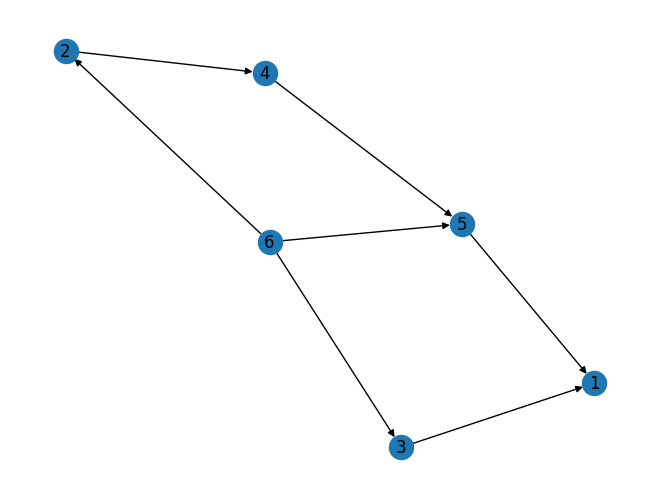

In [315]:
nx.draw(G,with_labels=True,pos=nx.spring_layout(G))

### Single Machine (CPU) - Topological Sort

In [316]:
print(list(nx.topological_sort(G)))

[6, 2, 3, 4, 5, 1]


### Multiple Machines (CPUs)

Problem notation: a | b | c

If we denote

- Machine environment

   - Pm := m Parallel and Identical machines,
   - P  := arbitrary numbers of machines.

- Job and scheduling constraints

  - pj := the time that job j takes on each machine (CPU here).
  - intree := each job has at most one successor,
  - outtree := each job has at most one predecessor.

- Objective Function
  - Cmax := the maximum of completion time of the jobs, i.e. Cmax=max(C1,C2,...Cn).

It requires the assumption that 
  - pj = P, which means each job has a &*fixed8 processing time, i.e., theyare of equal length.

#### P | pj = p, intree or outtree | Cmax - Polynomial Algorithm
It requires another assumption that 
  - the precedence constraint should be restricted to either intree or outtree.

**Hu's Algorithm**  -- Greedy Algorithm  O(|V|) or O(|V| log |V|)

Ref: PARALLEL SEQUENCING AND ASSEMBLY LINE PROBLEMS, T. C. Hu, IBM Research Center, Yorktown, New York, 1961

#### P2 | pj = p, prec | Cmax - Polynomial Algorithm
It requires another assumption that 
  - support only 2 machines (CPUs).

**Coffman Algorithm**  O(|V|+|A|) optimal

Intution: The Topological ordering must somehow space the dependencies apart as much as possible.

Ref: Optimal Scheduling for Two-Processor Systems, E. G. COFFUAN, Jr. and R. L. GRAHAM Received February 8, 1971



#### P | pj = p, prec | Cmax - NP-hard

#### Pm | pj = p, prec | Cmax - Open Question in 2004

*Reference: Chapter 3.2, Handbook of scheduling algorithms, Models and performance analysis,2004.*

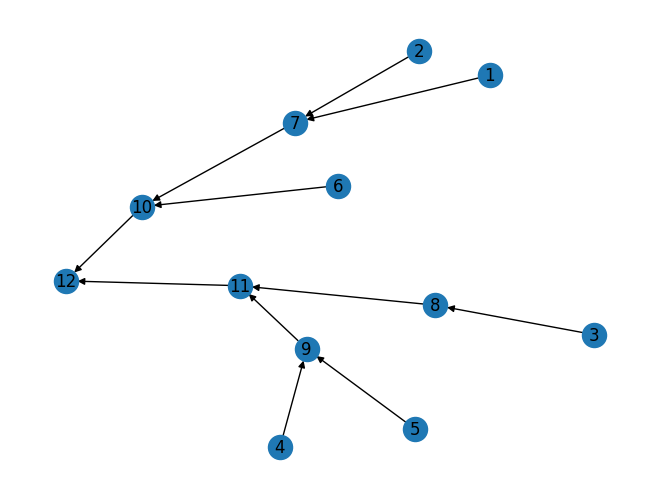

In [317]:
# Dependency Graph
# A = np.matrix([[1, 1], [1, 2]])
# temp = nx.MultiGraph()
# G = nx.from_numpy_array(A, parallel_edges = True, create_using = temp)

G=nx.DiGraph()
G.add_nodes_from(np.arange(1,12))

G.add_edges_from([(1,7),(2,7),(6,10),(7,10),(10,12),(3,8),(4,9),(5,9),(8,11),(9,11),(11,12)])

nx.draw(G,with_labels=True,pos=nx.spring_layout(G))

### Multiple Machines (CPUs)  - Coffman Algorithm
#### P2 | pj = p, prec | Cmax - Polynomial Algorithm

 

- Labeling Algorithm. 

    Let there be k jobs with no immediate successors. Assign in any order the integers 1, 2, . . . , k to these k jobs. Suppose we have already assigned the first j integers. Let J ′ be the set of jobs all of whose immediate successors have already been assigned a label. For each job i in J ′ , let N (i ) denote the decreasing sequence of integers formed from the labels of its immediate successors. Assign the integer j + 1 to the job i such that N(i) ≼ N(k) for all jobs k in J ′. Repeat this process until every job has been assigned a label.

    We note that jobs at a higher level are always assigned higher labels than jobs at a lower level. When two jobs are at the same level, they are differentiated by the labels of their immediate successors.

    That is, if the order is written as [T1, T2, T3, …, Tn] and if Tj depends on Ti, we want j-i to be as big as possible. Intuitively, this is desirable because the closer they are, the sooner we’d have to schedule Tj for execution after Ti, and since they can’t be executed on the same parallel round, we’d end up with unused CPUs. 

- Schedule the jobs as follows: 

    Whenever a machine is free for assignment, assign that ready job that has the highest label among all ready jobs.



In [318]:
print(list(nx.topological_sort(G)))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


### Multiple Machines (CPUs)  -  Hu's Algorithm 
#### P | pj = p, intree or outtree | Cmax - Polynomial Algorithm



Whenever a machine is free for assignment, assign that ready job (i.e., the one all of whose immediate predecessors have already finished execution), which is at the highest level among all ready jobs. Ties can be broken in an arbitrary manner.

Graph
- [x] adj_matrix
- [  ] adj_list, could be O(n) if each pass is O(1)

In [319]:
A= nx.adjacency_matrix(G)
adj_matrix_listoflists=A.todense()
print(adj_matrix_listoflists)
print(adj_matrix_listoflists[0][0])


[[0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
0


In [320]:
# If set to True, more debug information will be provided.
_peterdebug_hu_util_ = False

Clean up the graph:
- Transitive reduction: Removing the indirect dependencies is called 

In [321]:
def find_toExplore_set(row,column,adj_matrix_listoflists,toExplore_):
    """
    find ready job, the one all of whose immediate predecessors have already finished execution.

    the index of column that all elements are all 0.
    """
    toExplore =toExplore_.copy()

    toExploreList=list(toExplore)
    for job_index in range(0,len(toExploreList)):
        
        for i in range(1,row+1):
            j=toExploreList[job_index]
            v=adj_matrix_listoflists[i-1][j-1]
            
            if(v==1 and i in toExplore ):
                toExplore.remove(j)
                break
            
            if _peterdebug_hu_util_:print(v,end='')
        
        if _peterdebug_hu_util_: print("\n")
    
    if _peterdebug_hu_util_:print(toExplore)
    return toExplore
 


In [322]:
# If set to True, more debug information will be provided.
_peterdebug_hu_ = True

In [323]:
def hu(adj_matrix_listoflists,num_machines):
    row=len(adj_matrix_listoflists)
    if _peterdebug_hu_: print("row "+str(row))

    column=len(adj_matrix_listoflists[0])
    if _peterdebug_hu_: print("column "+str(column))

    toExplore= set()

    # initialise toExplore
    for i in range(1,row+1):
        toExplore.add(i)

    res= [[] for _ in range(num_machines)]
    timestamp=0
    completion_time_max=0
    while len(toExplore):
        timestamp+=1
        ready_job_set=find_toExplore_set(row,column,adj_matrix_listoflists,toExplore)
        loop = min(len(ready_job_set),num_machines)
        for i in range(0,loop):
            ready_job_index = ready_job_set.pop()
            # update matrix:
            print(ready_job_index)
            res[i].append((ready_job_index,timestamp))
            toExplore.remove(ready_job_index)
        if _peterdebug_hu_: print(toExplore)
        completion_time_max=timestamp
    return res,completion_time_max

In [324]:
num_machines=4
completion_time_max=0
res= [[] for _ in range(num_machines)]
res,completion_time_max=hu(adj_matrix_listoflists,num_machines)

row 12
column 12
1
2
3
4
{5, 6, 7, 8, 9, 10, 11, 12}
5
6
7
8
{9, 10, 11, 12}
9
10
{11, 12}
11
{12}
12
set()


In [325]:
print(res)
print(completion_time_max)

[[(1, 1), (5, 2), (9, 3), (11, 4), (12, 5)], [(2, 1), (6, 2), (10, 3)], [(3, 1), (7, 2)], [(4, 1), (8, 2)]]
5


[5, 3, 2, 2]


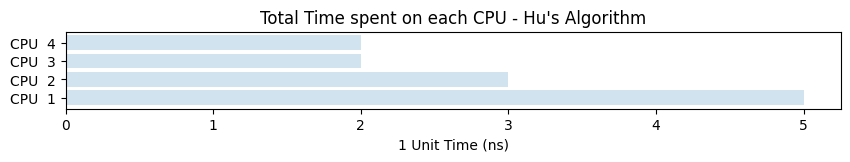

In [326]:
y_pos=np.arange(num_machines)
CPU_label=[]
CPU_total_time=[]
for i in range(num_machines):
    CPU_label.append('CPU  '+str(i+1))
    CPU_total_time.append(len(res[i]))

print(CPU_total_time)

plt.figure(figsize=[10,1])
# for j in range(len(res[i])):
#     plt.barh(x,res[i][j][1],alpha=0.2)
plt.barh(y_pos,CPU_total_time,alpha=0.2)
plt.xlabel("1 Unit Time (ns)")
plt.yticks(y_pos,CPU_label)

plt.title("Total Time spent on each CPU - Hu's Algorithm")
plt.show()

In [327]:
print(res)

[[(1, 1), (5, 2), (9, 3), (11, 4), (12, 5)], [(2, 1), (6, 2), (10, 3)], [(3, 1), (7, 2)], [(4, 1), (8, 2)]]


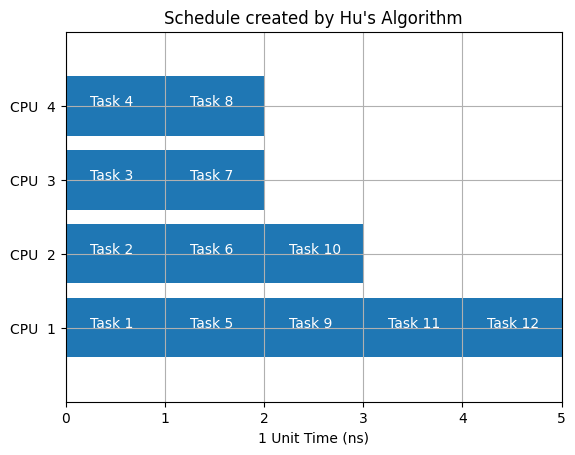

In [328]:
# Horizontal bar plot with gaps
fig, ax = plt.subplots()
for i in range(len(res)):
    for j in range(len(res[i])):
        ax.broken_barh([(res[i][j][1]-1, 1)], (5+6+10*i, 8), facecolors='tab:blue')
        ax.text(0.25+j*1,15+i*10,"Task "+str(res[i][j][0]),fontsize=10,color='white')
 
ax.set_ylim(5, 5+(num_machines+1)*10)
ax.set_xlim(0, completion_time_max)
ax.set_xlabel('1 Unit Time (ns)')
y_label_pos=[]
for i in range(0,num_machines):
    y_label_pos.append(15+i*10)
ax.set_yticks(y_label_pos, labels=CPU_label)     # Modify y-axis tick labels
ax.grid(True)                                       # Make grid lines visible

plt.title("Schedule created by Hu's Algorithm")

plt.show()